<a id="cuarto"></a>
## 4. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante difícil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero para simplificar el manejo y cómputo, se trabajará con representaciones de características extraídas (descriptores). Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

```python
import scipy.io as sio
sio.loadmat("AgeGenderClassification/eventest.mat")
sio.loadmat("AgeGenderClassification/eventrain.mat")
```


Para descripción sobre las columnas y metadatos del archivo descargado favor dirigirse al archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```
En el apartado "*MATLAB DATA*".

> a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [54]:
import scipy.io as sio
mat_train = sio.loadmat("eventrain.mat")
mat_test = sio.loadmat("eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]

In [55]:
for i in range(11):
    print data_train[i].shape
print "*****"
for i in range(11):
    print data_test[i].shape

(3500, 14)
(3500, 1)
(3500, 1)
(3500, 37)
(3500, 600)
(3500, 2989)
(3500, 1)
(3500, 1)
(1, 3500)
(3500, 7)
(3500, 2)
*****
(1050, 14)
(1050, 1)
(1050, 1)
(1050, 37)
(1050, 600)
(1050, 2989)
(1050, 1)
(1050, 1)
(1, 1050)
(1050, 7)
(1050, 2)


Los datos consisten en 11 arreglos diferentes cada uno dentro de data_train y data_test (según el README y probando)La cantidad de columnas de las matrices de entrenamiento es 3500 la cantidad de columnas de las matrices de test es 1050 hay un comportamiento extraño en la 9° matriz ya que las columnas y filas están invertidas.

> b) Elija cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo de aprendizaje a utilizar, recuerde que puede utilizar una combinación de éstos si lo desea. Además extraiga las salidas/*output* del problema, en este caso, como ya se comentó, la edad. Describa los datos utilizados y la cantidad de datos por rango de edad.

In [56]:
ageClass = data_train[1] #target
genFeat = data_train[0]  #it can be used as representation: contextual features
ffcoefs = data_train[3]   #it can be used as representation: fisherface space
faceGist = data_train[4]  #it can be used as representation
######################################
ageClassTest = data_test[1] 
genFeatTest = data_test[0]  
ffcoefsTest = data_test[3]   
faceGistTest = data_test[4]  

Nosotros trabajaremos con genFeat, el cual corresponde a diferentes caracteristicas, que esta compuesto por 14 dimensiones.

> c) Defina y entrene modelos de aprendizaje para la inferencia de la edad de la persona a través de la representación escogida, *se espera que experimente con distintas configuraciones, modelos e hiper-parámetros* . Intente llegar a un *MSE* menor a 100 sobre la edad de las personas en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

(3500, 1)


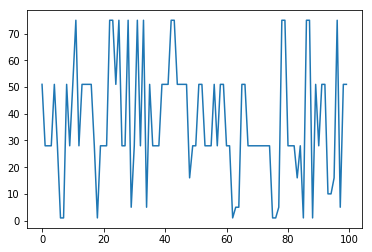

In [57]:
print ageClass.shape
import matplotlib.pyplot as plt
plt.plot(ageClass[0:100])
plt.show()

Se comprueba que los datos objetivo (Y=ageClass) están discretizados y organizados por grupos por lo que trataremos al problema como un problema de clasificación.

(3500, 14)


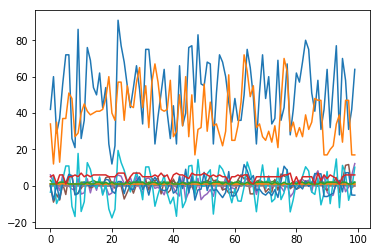

(3500, 1)


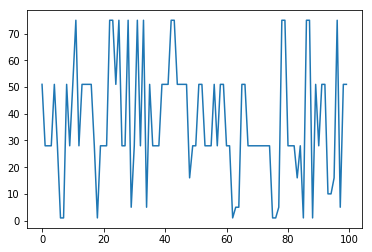

In [58]:
print genFeat.shape
import matplotlib.pyplot as plt
plt.plot(genFeat[0:100])
plt.show()


print ageClass.shape
import matplotlib.pyplot as plt
plt.plot(ageClass[0:100])
plt.show()



A partir de 14 variables (features) se pretende predecir su ageClass 

In [59]:
X_train=genFeat
Y_train=ageClass
X_test=genFeatTest
Y_test=ageClassTest
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X_train,Y_train)

(3500, 14)
(3500, 1)
(1050, 14)
(1050, 1)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [60]:

from sklearn.metrics import mean_squared_error
print("Train MSE: ",mean_squared_error(Y_train, model.predict(X_train)))
print("Test MSE: ",mean_squared_error(Y_test, model.predict(X_test)))

('Train MSE: ', 50.296571428571426)
('Test MSE: ', 55.79142857142857)


*Nota: Puede notar que la cantidad de edades presentes en el problema son pocas (1,  5, 10, 16, 28, 51 o 75 años), por lo que puede tratar al problema así como de regresión o clasificación (considerando cada edad como una clase)*


#### Ayuda:

> Para problemas de clasificación de múltiples clases, la red neuronal de *keras* necesita una represnetacion *one hot vector* similar a lo comentado en la sección 2, por lo que será necesario transformar/codificar las edades a etiquetas categóricas, donde cada columna del vector representará una categoría. Por ejemplo, si existen tres categorías (perro, gato, ratón), la categoría perro puede ser codificada como [1,0,0], y la categoría ratón puede ser codificada como [0,0,1]. Para ésto la librería *keras* nos ayuda:

<div class="alert alert-warning"> Recuerde que si trabaja el problema como clasificación deberá invertir la transformación de codificación de las edades a clases, para así poder evaluar el MSE </div>


In [70]:
# X_train=genFeat
# Y_train=ageClass
# X_test=genFeatTest
# Y_test=ageClassTest
import numpy
def vectorizando(ageClass):
    labels=[1,5,10,16,28,51,75]
    vector=[]
    for i in range (ageClass.shape[0]):
        activo=0
        agregado=[0,0,0,0,0,0,0]
        for j in range (len(labels)):
            if ageClass[i]==labels[j]:
                activo=j
        agregado[activo]=1
        vector.append(agregado)
    return numpy.array(vector)


In [71]:
vector_train=vectorizando(Y_train)
print vector_train.shape
print X_train.shape  

(3500, 7)
(3500, 14)


In [72]:
from sklearn.tree import DecisionTreeClassifier as Tree
def modelTree(XTRAIN,YTRAIN):
    model = Tree() 
    model.set_params(max_depth=5,criterion='gini',splitter='best')
    model.fit(XTRAIN,YTRAIN)
    return model
model=modelTree(X_train,vector_train)


In [74]:
print mean_squared_error(vector_train, model.predict(X_train))

print mean_squared_error(vectorizando(Y_test), model.predict(X_test))


0.13081632653061223
0.17142857142857143


*Recuerde que:* Si encuentra que la métrica evaluadora le perjudica puede acudir a otras para entender el qué está pasando con su modelo.